
## NBA project

Here you will find a little project about data analysis. Particularly, this project contains data manipulation, data visualization, OLS, Logit and MEM (Mixed Effects Models). I´m using an `nba` database which contains 5313 players from 1947-2025. You can find more details about this dataset [here](https://www.kaggle.com/datasets/flynn28/v2-nba-player-database/data).

I will be working with this variables:

`Name`: Players name

`Position`: Players position(s)

`Height`: Height of player (inches)

`Weight`: Weight of player (lbs)

`School`: School(s) player attended

`Active`: If player is currently playing (True or False)

`G`: amount of games played by player

`PTS`: average points scored by player per game

`TRB`: average rebounds by player per game

`AST`: average assists per game

## Research exercise

For this project, I will be analyzing the relationship between being a Center (here I will include those who can play two positions, for example Forward-Center or Center-Forward ) and scoring performance. Also, some predictors will be included, such as Games played, Height, Weight, average total asists per game (AST), average total rebounds per game (TRB).

## Data and libraries

So, let's get into the data! We will be working with the following libraries. Then we load our NBA data.

In [37]:

library(dplyr)
library(ggplot2)
library(scales)
library(lme4)
library(misty)
library(texreg)
library(ggrepel)
library(tidyr)
library(lattice)
library(gridExtra)
library(ggthemes)
library(stargazer)
library(IRdisplay)
nba<- read.csv("D:/RSTUDIOWD/papers/nba-proyect/NBA_PLAYERS.csv")


## Variable processing in R

First, we clear our NA cases


In [38]:
nba<- nba %>% 
  na.omit()

Now, let's take a look at the variables in the dataset

In [39]:
colnames(nba)

[1] "Name"     "Debut"    "Final"    "Position" "Height"   "Weight"  
 [7] "Birthday" "School"   "HOF"      "Active"   "G"        "PTS"     
[13] "TRB"      "AST"      "FG."      "FG3."     "FT."      "eFG."    
[19] "PER"      "WS"

For the Schools, we display the 10 schools with most cases

In [40]:
colnames(nba)
nba %>% 
count(School, sort = T) %>% 
  head(10)

[1] "Name"     "Debut"    "Final"    "Position" "Height"   "Weight"  
 [7] "Birthday" "School"   "HOF"      "Active"   "G"        "PTS"     
[13] "TRB"      "AST"      "FG."      "FG3."     "FT."      "eFG."    
[19] "PER"      "WS"

,School,n
,<chr>,<int>
1,,327
2,['Kentucky'],89
3,['Duke'],77
4,['UCLA'],75
5,['UNC'],74
6,['Kansas'],57
7,['Michigan'],48
8,['Arizona'],47
9,['Indiana'],41


Here we observe that the variable with most cases is not labeled, but is not a missed value either. This means that these players did not come from any School. We label this situation as \`street\`.

In [41]:
nba <- nba %>%
  mutate(School = ifelse(School == "" | is.na(School), "street", School))

For \`Height\` and \`Weight\` variables, we transform them to a real metric system :D

In [42]:
nba<- nba %>% 
  mutate(
    Height_cm = Height * 2.54,
    Weight_kg = Weight * 0.453592,
    total_pts_carrer = PTS * G
    )

nba %>% 
  summarise(
    mean_pts = mean(PTS),
    max_pts = max(PTS),
    sd_pts = sd(PTS),
    avg_height = mean(Height_cm),
    avg_weight = mean(Weight_kg)
  )

mean_pts,max_pts,sd_pts,avg_height,avg_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.257452,30.1,4.827874,198.7787,95.68334


For \`Position\` variable, we display its values and then filter the variable to include only those cases in which players are listed as Center, Forward-Center or Center-Forward.

In [43]:
nba %>% 
  count(Position)

nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']")) %>% 
  group_by(Position) %>% 
  summarise(AVG_PTS = mean(PTS))

Position,n
<chr>,<int>
"['Center', 'Forward']",144
['Center'],282
"['Forward', 'Center']",293
"['Forward', 'Guard']",136
['Forward'],988
"['Guard', 'Forward']",298
['Guard'],1422


Position,AVG_PTS
<chr>,<dbl>
"['Center', 'Forward']",8.949306
['Center'],6.687943
"['Forward', 'Center']",8.673720


NBA Centers score an average of 6 to 9 points per game aprox. Also, their average height it's about 2 meters. For weight, a tipical NBA Center it's around 100kg. Now we can explore our Centers:

In [44]:
nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']"),
         Active == "True") %>%  
  group_by(Position) %>% 
  slice_max(order_by = PTS, n = 10) %>% 
  select(Position, Name, PTS, Active, Height_cm, Weight_kg) %>% 
  arrange(Position, desc(PTS))


Position,Name,PTS,Active,Height_cm,Weight_kg
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
"['Center', 'Forward']",Karl-Anthony Towns,23.1,True,213.36,112.49082
"['Center', 'Forward']",Victor Wembanyama,22.5,True,220.98,106.59412
"['Center', 'Forward']",Nikola Jokić,21.8,True,210.82,128.82013
"['Center', 'Forward']",Domantas Sabonis,16.1,True,208.28,108.86208
"['Center', 'Forward']",Alperen Şengün,16.0,True,210.82,106.59412
"['Center', 'Forward']",Bam Adebayo,15.7,True,205.74,115.66596
"['Center', 'Forward']",Myles Turner,14.1,True,210.82,113.39800
"['Center', 'Forward']",Al Horford,12.9,True,205.74,108.86208
"['Center', 'Forward']",Jarrett Allen,12.8,True,210.82,110.22286


We can narrow it down further to top 3 Centers:

In [45]:
nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']"),
         Active == "True") %>%  
  group_by(Position) %>% 
  slice_max(order_by = PTS, n = 3) %>% 
  select(Position, Name, PTS, Active, Height_cm, Weight_kg, G,total_pts_carrer) %>% 
  arrange(Position, desc(PTS))

Position,Name,PTS,Active,Height_cm,Weight_kg,G,total_pts_carrer
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
"['Center', 'Forward']",Karl-Anthony Towns,23.1,True,213.36,112.4908,645,14899.5
"['Center', 'Forward']",Victor Wembanyama,22.5,True,220.98,106.5941,117,2632.5
"['Center', 'Forward']",Nikola Jokić,21.8,True,210.82,128.8201,745,16241.0
['Center'],Joel Embiid,27.7,True,213.36,127.0058,452,12520.4
['Center'],Nikola Vučević,17.2,True,208.28,117.9339,972,16718.4
['Center'],Deandre Ayton,16.4,True,213.36,113.3980,398,6527.2
"['Forward', 'Center']",Zion Williamson,24.7,True,198.12,128.8201,214,5285.8
"['Forward', 'Center']",Anthony Davis,24.1,True,208.28,114.7588,787,18966.7
"['Forward', 'Center']",Kristaps Porziņģis,19.6,True,218.44,108.8621,501,9819.6


We observe that the top 3 Centers (including Center-Forward and Forward-Center) score way more than an average NBA Center. The top 3 are also above average in height and weight. Joel Embiid is the Center with most average points scored, while Wembanyama is the taller Center. Finally, we found that Jokić and Williamson are tied in terms of weight.

Before we jump into the inference analysis, we need to do some changes first:

-   Rename the variable \`G\` to \`games\`

-   Create a new variable called \`PTSCENTER\`, which contains the average points scored by active Centers in 2025

-   Change the reference category for Position variable to "\['Center'\]"

In [46]:
nba<- nba %>% 
  mutate(
    games = G,
    PTSCENTER = case_when(
      Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']") & Active == "True" ~ PTS
    )
  )

nba <- nba %>% 
  mutate(
    Position = relevel(factor(Position), ref = "['Center']")
  )


We create a new dataset for active Centers

In [47]:
nba_centers <- nba %>%
  filter(!is.na(PTSCENTER))

## Inference Analysis

For this part of the exercise, we estimate a linear regression model (OLS), which says as follows:

$$
AvgPointsScored_i = \beta_0 + \beta_1  Position_i + \beta_2Games_i + \beta_3Height_{cm_i} + \beta_4 Weight_{cm_i} + \\ \beta_5AvgAsist_i +  \beta_6AvgRebounds_i + \varepsilon_i
$$

We estimate model 1 and its fitted values

In [48]:
m1<- lm(PTSCENTER ~ Position + games +Height_cm + Weight_kg + AST + TRB, data = nba_centers )

nba_centers$fittedvalues <- predict(m1)

In [49]:
IRdisplay::display_html(stargazer(m1,
                                  type = "html",
                                  single.row = TRUE,
                                  digits = 2,
                                  title = "Table 1: OLS",
                                  dep.var.labels = c("Points scored per game"),
                                  covariate.labels = c(
                                      "Position [Center, Forward]",
                                      "Position [Forward, Center]",
                                      "games",
                                      "Height (cm)",
                                      "Weight (kg)",
                                      "Asist per game",
                                      "Rebounds per game",
                                      "Intercept"
                                  ),
                                  notes = "Own elaboration"))



Table 1: OLS Dependent variable: Points scored per game Position [Center, Forward] -0.10 (0.72) Position [Forward, Center] 1.91 *** (0.61) games 0.001 (0.001) Height (cm) 0.10 * (0.06) Weight (kg) 0.01 (0.03) Asist per game 2.44 *** (0.31) Rebounds per game 0.93 *** (0.13) Intercept -23.39 * (12.41) Observations 119 R 2 0.79 Adjusted R 2 0.78 Residual Std. Error 2.53 (df = 111) F Statistic 60.27 *** (df = 7; 111) Note: * p<0.1; ** p<0.05; *** p<0.01 Own elaboration


<table style="text-align:center"><caption><strong>Table 1: OLS</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>Points scored per game</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Position [Center, Forward]</td><td>-0.10 (0.72)</td></tr>
<tr><td style="text-align:left">Position [Forward, Center]</td><td>1.91<sup>***</sup> (0.61)</td></tr>
<tr><td style="text-align:left">games</td><td>0.001 (0.001)</td></tr>
<tr><td style="text-align:left">Height (cm)</td><td>0.10<sup>*</sup> (0.06)</td></tr>
<tr><td style="text-align:left">Weight (kg)</td><td>0.01 (0.03)</td></tr>
<tr><td style="text-align:left">Asist per game</td><td>2.44<sup>***</sup> (0.31)</td></tr>
<tr><td style="text-align:left">

From the model 1 table, we observe the following:
* "Center-Forward" players score, on average, 0.10 points fewer per game than pure "Center" players, controlling for other variables. However, this difference is not statistically significant (p > 0.05).
* "Forward-Center" players score on average 1.91 points more per game than pure "Center" players, controlling for other variables. This difference is statistically significant at the 99% of confidence interval.
* For each additional assist, the player’s average points per game increase by 2.44 points. This situation is statistically significant at all traditional confidence interval levels.
* For each additional rebond, the player's average points per game increase by 0,93 points. This is statistically significant at the 99% of confidence level.
* Others predictors, such as games, height or weight do not show statistically significant relations.

After that, we obtain the 10 highest fitted values and then we generate the plot

In [50]:
nba_centers %>% 
  select(Name, PTS, fittedvalues, Position) %>% 
  slice_max(order_by = fittedvalues, n = 10) 


Name,PTS,fittedvalues,Position
<chr>,<dbl>,<dbl>,<fct>
Nikola Jokić,21.8,27.67629,"['Center', 'Forward']"
Domantas Sabonis,16.1,21.36599,"['Center', 'Forward']"
Victor Wembanyama,22.5,19.74089,"['Center', 'Forward']"
Joel Embiid,27.7,19.38460,['Center']
Julius Randle,19.0,19.01301,"['Forward', 'Center']"
Karl-Anthony Towns,23.1,18.13937,"['Center', 'Forward']"
Anthony Davis,24.1,17.89131,"['Forward', 'Center']"
Alperen Şengün,16.0,17.47692,"['Center', 'Forward']"
Zion Williamson,24.7,16.95292,"['Forward', 'Center']"


For our predictions, we found that Jokić had the highest fitted value with 27 points. We also observe that Center-Forward had higher values than other combinations.

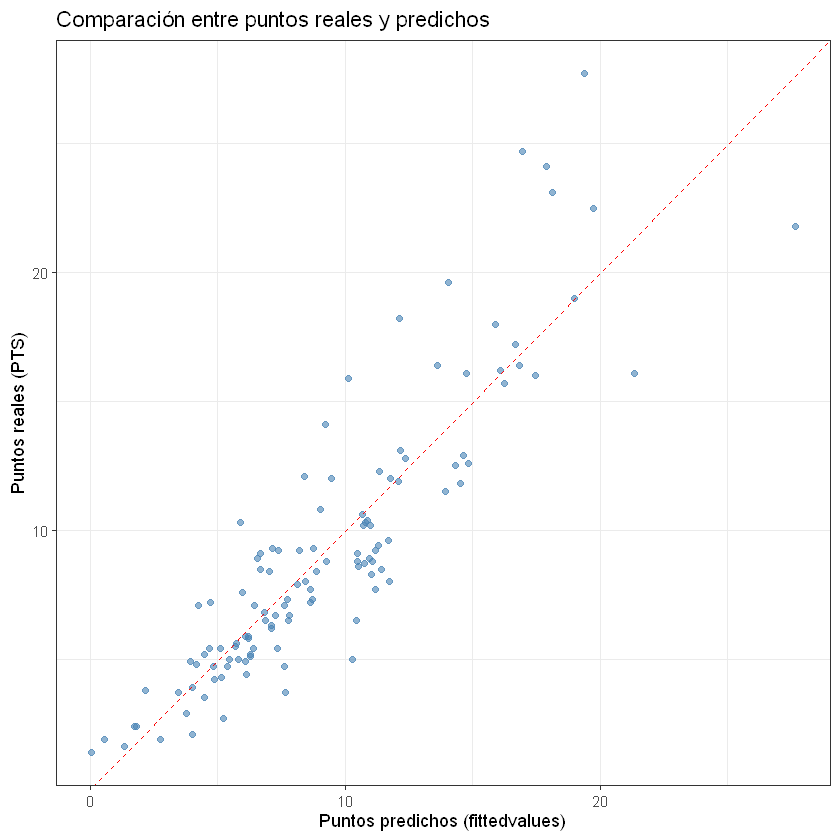

In [51]:
nba_centers %>%
  ggplot(aes(x = fittedvalues, y = PTS)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Comparación entre puntos reales y predichos",
    x = "Puntos predichos (fittedvalues)",
    y = "Puntos reales (PTS)"
  ) +
  theme_bw()

## Logit Model

For this part, we estimate a logit model. First things first, we obtain the average rebounds from the entire sample. Then we get the max and min rebounds values.

In [52]:
nba_centers %>% 
  summarise(
    avg_rb = mean(TRB),
    max = max(TRB),
    min = min(TRB)
  )

avg_rb,max,min
<dbl>,<dbl>,<dbl>
5.872269,12.1,0.4


In the following step, we create a new variable called \`rb_dummy\` in which returns 1 if the player have an average of 6 or greater rebounds per game, and 0 if the total rebounds are less than 6.

In [53]:
nba_centers <- nba_centers %>% 
  mutate(
    rb_dummy = case_when(
      TRB >= 6 ~ 1,
      TRB < 6 ~ 0
    )
  )

We estimate the logit model

In [54]:
m2<- glm(rb_dummy ~  PTSCENTER + Position + games +Height_cm + Weight_kg + AST, data = nba_centers,
         family = binomial (link = "logit") )

In [55]:

IRdisplay::display_html(stargazer(m2,
                                  type = "html",
                                  single.row = TRUE,
                                  digits = 2,
                                  title = "Table 2: Log-odds",
                                  dep.var.labels = c("Good rebounder"),
                                  covariate.labels = c(
                                      "Position [Center, Forward]",
                                      "Position [Forward, Center]",
                                      "games",
                                      "Height (cm)",
                                      "Weight (kg)",
                                      "Asist per game",
                                      "Rebounds per game",
                                      "Intercept"
                                  ),
                                  notes = "Own elaboration"))

Table 2: Log-odds Dependent variable: Points scored per game Position [Center, Forward] 0.69 *** (0.19) Position [Forward, Center] -1.65 (1.04) games -1.65 * (0.90) Height (cm) -0.001 (0.001) Weight (kg) -0.03 (0.10) Asist per game 0.08 (0.05) Rebounds per game 2.12 ** (0.87) Intercept -9.46 (19.15) Observations 119 Log Likelihood -29.87 Akaike Inf. Crit. 75.73 Note: * p<0.1; ** p<0.05; *** p<0.01 Own elaboration


<table style="text-align:center"><caption><strong>Table 2: Log-odds</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>Points scored per game</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Position [Center, Forward]</td><td>0.69<sup>***</sup> (0.19)</td></tr>
<tr><td style="text-align:left">Position [Forward, Center]</td><td>-1.65 (1.04)</td></tr>
<tr><td style="text-align:left">games</td><td>-1.65<sup>*</sup> (0.90)</td></tr>
<tr><td style="text-align:left">Height (cm)</td><td>-0.001 (0.001)</td></tr>
<tr><td style="text-align:left">Weight (kg)</td><td>-0.03 (0.10)</td></tr>
<tr><td style="text-align:left">Asist per game</td><td>0.08 (0.05)</td></tr>
<tr><td style="text-align:left">Reboun

From the model 2 table, we observe the following:
* For each additional point scored by a center, the odds of being a good assister increase by a factor of 1.99.
* This situation is statistically significant at all traditional confidence interval levels.
* Others preddictos, such as Position, games, height, weight, 

## Multilevel model (MEM)

Finally, we estimate a multilevel model. In this part, we expand the sample to include all positions and players in the data base whether actives or not. Lastly, for the level-2 variables, we select the top 5 schools with the highest players in order to simplify the exercise.

In [56]:
nba<- nba %>% 
  mutate(
    CENTERS = Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']")
    )
  
top5_schools <- nba %>%
  count(School, sort = TRUE) %>%
  slice_max(n, n = 5) %>%
  pull(School)
  
 

nba_top5_schools <- nba %>% 
  filter(School %in% top5_schools) 

nba_top5_schools %>% 
  count(School, sort = T)

School,n
<chr>,<int>
street,327
['Kentucky'],89
['Duke'],77
['UCLA'],75
['UNC'],74


## Centering

Our interest is to


In [57]:
nba_top5_schools$games_cgm <- center(nba_top5_schools$games, type = "CGM")
nba_top5_schools$Height_cm_cgm <- center(nba_top5_schools$Height_cm, type = "CGM")
nba_top5_schools$Weight_kg_cgm <- center(nba_top5_schools$Weight_kg, type = "CGM")
nba_top5_schools$AST_cgm <- center(nba_top5_schools$AST, type = "CGM")
nba_top5_schools$TRB_cgm <- center(nba_top5_schools$TRB, type = "CGM")

nba_top5_schools <- nba_top5_schools %>%
  filter(Position %in% c("['Center']", "['Center', 'Forward']", "['Forward', 'Center']"))

We estimate three models. First, the

In [58]:
mnulo<- lmer(PTS ~ 1 + (1|School), data = nba_top5_schools)

m3<- lmer(PTS ~ Position + games_cgm + Height_cm_cgm + Weight_kg_cgm + AST_cgm + TRB_cgm + (1|School)  , data = nba_top5_schools)


m4<- lmer(PTS ~ Position + games_cgm + Height_cm_cgm + Weight_kg_cgm + AST_cgm + TRB_cgm + (TRB_cgm|School)  , data = nba_top5_schools)
screenreg(list(mnulo,m3, m4), single.row = T)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



===========================================================================================
                                 Model 1             Model 2             Model 3           
-------------------------------------------------------------------------------------------
(Intercept)                         8.89 (0.73) ***     5.26 (0.67) ***     5.09 (0.67) ***
Position['Center', 'Forward']                           0.64 (0.56)         0.50 (0.56)    
Position['Forward', 'Center']                           1.57 (0.48) **      1.58 (0.47) ***
games_cgm                                               0.00 (0.00) *       0.00 (0.00) *  
Height_cm_cgm                                           0.12 (0.04) **      0.13 (0.04) ** 
Weight_kg_cgm                                           0.02 (0.02)         0.02 (0.02)    
AST_cgm                                                 1.90 (0.25) ***     1.85 (0.25) ***
TRB_cgm                                                 1.09 (0.11) ***     1.16 (0.14) ***
-------------------------------------------------------------------------------------------
AIC                              1154.21              882.39              882.81           
BIC                              1163.82              914.43              921.26           
Log Likelihood                   -574.11             -431.19             -429.40           
Num. obs.                         182                 182                 182              
Num. groups: School                 5                   5                   5              
Var: School (Intercept)             1.36                0.00                0.00           
Var: Residual                      31.85                5.97                5.71           
Var: School TRB_cgm                                                         0.04           
Cov: School (Intercept) TRB_cgm                                             0.00           
===========================================================================================
*** p < 0.001; ** p < 0.01; * p < 0.05

In [69]:
IRdisplay::display_html(stargazer(mnulo,m3,m4,
                                  type = "html",
                                  single.row = TRUE,
                                  digits = 2,
                                  title = "Table 2: Log-odds",
                                  dep.var.labels = c("Points scored per game"),
                                  covariate.labels = c(
                                      "Position [Center, Forward]",
                                      "Position [Forward, Center]",
                                      "games (grand mean)",
                                      "Height (cm)(grand mean)",
                                      "Weight (kg)(grand mean)",
                                      "Asist per game (grand mean)",
                                      "Rebounds per game (grand mean)",
                                      "Intercept"
                                  ),
                                  notes = "Own elaboration"))

Table 2: Log-odds Dependent variable: Points scored per game (1) (2) (3) Position [Center, Forward] 0.64 (0.56) 0.50 (0.56) Position [Forward, Center] 1.57 *** (0.48) 1.58 *** (0.47) games (grand mean) 0.001 ** (0.001) 0.002 ** (0.001) Height (cm)(grand mean) 0.12 *** (0.04) 0.13 *** (0.04) Weight (kg)(grand mean) 0.02 (0.02) 0.02 (0.02) Asist per game (grand mean) 1.90 *** (0.25) 1.85 *** (0.25) Rebounds per game (grand mean) 1.09 *** (0.11) 1.16 *** (0.14) Intercept 8.89 *** (0.73) 5.26 *** (0.67) 5.09 *** (0.67) Observations 182 182 182 Log Likelihood -574.11 -431.19 -429.40 Akaike Inf. Crit. 1,154.21 882.39 882.81 Bayesian Inf. Crit. 1,163.82 914.43 921.26 Note: * p<0.1; ** p<0.05; *** p<0.01 Own elaboration


<table style="text-align:center"><caption><strong>Table 2: Log-odds</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">Points scored per game</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Position [Center, Forward]</td><td></td><td>0.64 (0.56)</td><td>0.50 (0.56)</td></tr>
<tr><td style="text-align:left">Position [Forward, Center]</td><td></td><td>1.57<sup>***</sup> (0.48)</td><td>1.58<sup>***</sup> (0.47)</td></tr>
<tr><td style="text-align:left">games (grand mean)</td><td></td><td>0.001<sup>**</sup> (0.001)</td><td>0.002<sup>**</sup> (0.001)</td></tr>
<tr><td style="text-align:left">He

Now we calculate the ICC


In [59]:
ICC = 0.93/(0.93+29.32) * 100
print(ICC)


[1] 3.07438


The ICC (Intra-class Correlation Coeficient) reveals that only 3% of the variance in our dependent variable is explained by the nesting structure. Despite the low ICC value, we will continue using multilevel models as it aligns with the objectives of this project. Now, we will continue with an 
ANOVA test to compare a model with and without random coefficient.

In [60]:
anova(m3,m4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m3,10,853.3820,885.4221,-416.6910,833.3820,NA,NA,NA
m4,12,854.9236,893.3717,-415.4618,830.9236,2.458411,2,0.2925249


The ANOVA test shows that although allowing the TRB coefficient to vary improves the model fit, the difference is not statistically significant with p-value 0.07. For now, we will we working with model 3 (without random slopes).

For now, we would like to know how our level-2 groups are distributed. To do this, we create a model with all the schools included. This allow us to plot the distribution of level-2 group interceps. After that, we focus only on our top 5 schools and plot them separately.

$School


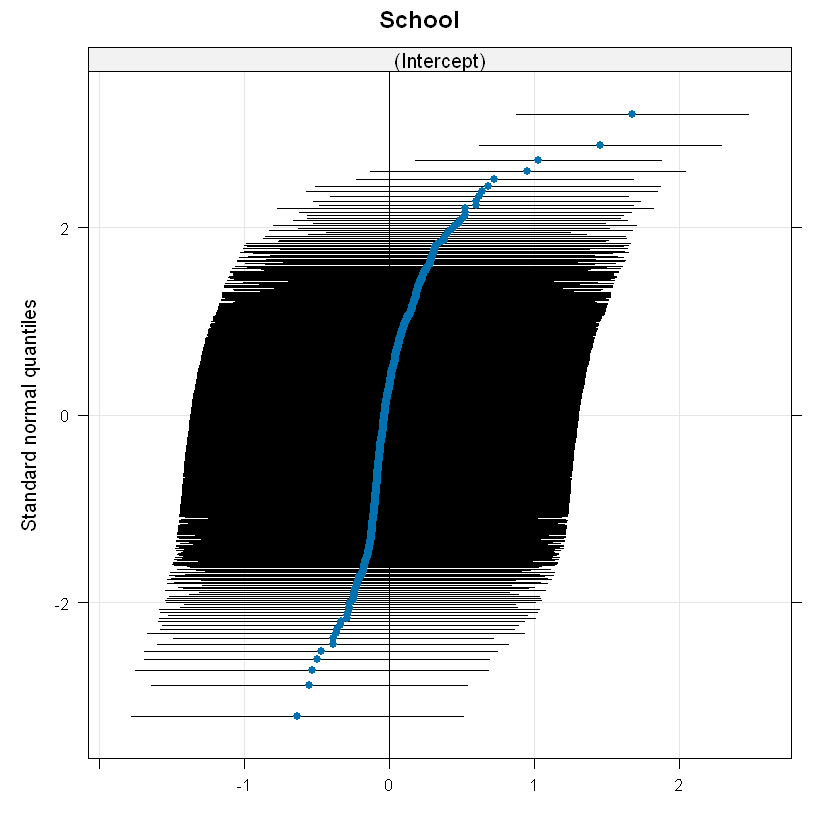

In [61]:
m10<- lmer(PTS ~ (1|School), data = nba)
qqmath(ranef(m10, condVar = T))

As we can see, our level-2 groups are likely normally distributed. Now we plot only our top 5 schools.

$School


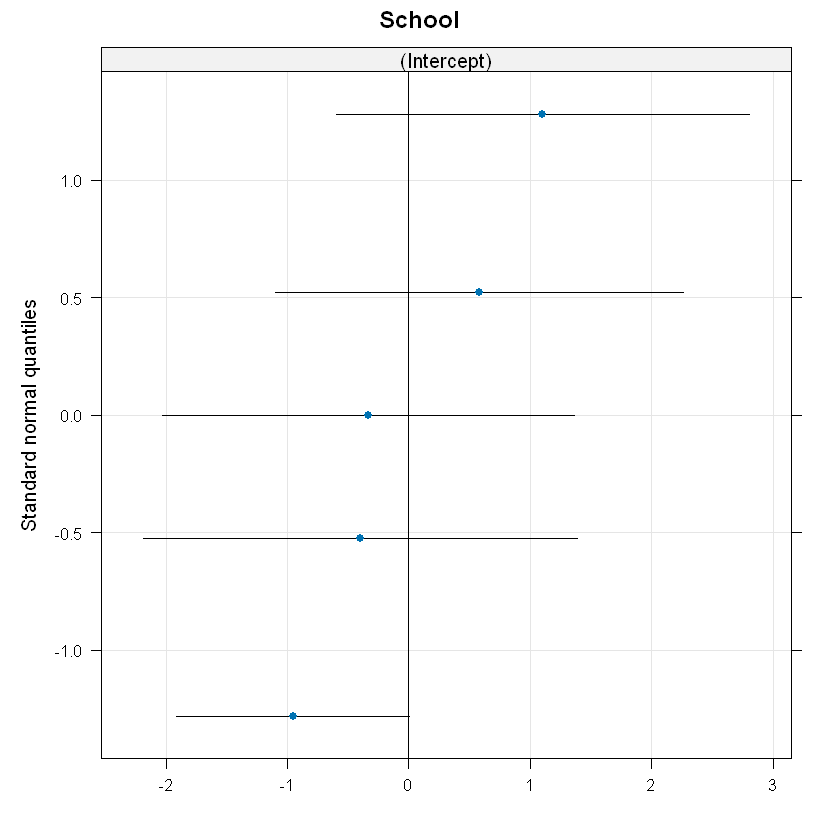

In [62]:
qqmath(ranef(mnulo, condVar = TRUE))

The top 5 schools follow a similar distribution as the plot with all school interceps.
Now, we plot model 3

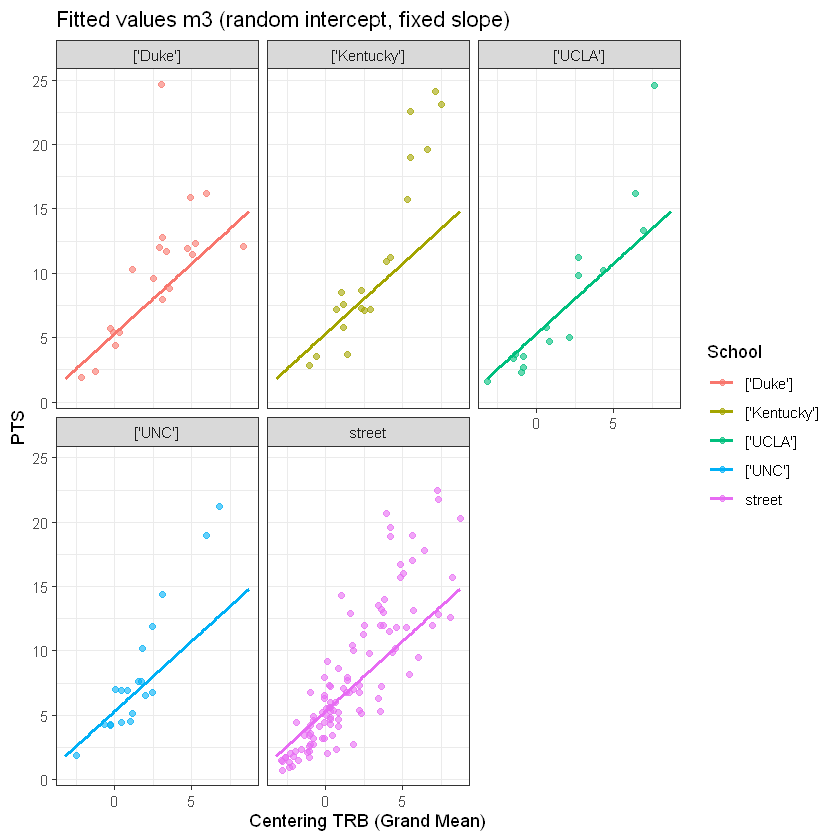

In [63]:
ranefs_m3 <- ranef(m3)$School
ranefs_m3$School <- rownames(ranefs_m3)
colnames(ranefs_m3) <- c("intercept_ranef", "School")

fixefs_m3 <- fixef(m3)
intercept_fixed <- fixefs_m3["(Intercept)"]
slope_fixed <- fixefs_m3["TRB_cgm"]


TRB_seq <- seq(from = min(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               to = max(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               length.out = 100)

line_data_m3 <- expand.grid(
  TRB_cgm = TRB_seq,
  School = unique(nba_top5_schools$School)
)

line_data_m3 <- left_join(line_data_m3, ranefs_m3, by = "School")

line_data_m3 <- line_data_m3 %>%
  mutate(
    intercept_total = intercept_fixed + intercept_ranef,
    # Pendiente fija, igual para todas las escuelas
    slope_total = slope_fixed,
    PTS_pred = intercept_total + slope_total * TRB_cgm
  )

ggplot(nba_top5_schools, aes(x = TRB_cgm, y = PTS, color = School)) +
  geom_point(alpha = 0.6) +
  geom_line(data = line_data_m3, aes(x = TRB_cgm, y = PTS_pred, color = School), size = 1) +
  facet_wrap(~ School) +
  labs(
    title = "Fitted values m3 (random intercept, fixed slope)",
    x = "Centering TRB (Grand Mean)",
    y = "PTS",
    color = "School"
  ) +
  theme_bw()

modelo 4 plot

In [64]:
nba_top5_schools$PTS_pred <- predict(m4, re.form = NULL)
ranefs <- ranef(m4)$School
ranefs$School <- rownames(ranefs)
colnames(ranefs) <- c("intercept_ranef", "TRB_cgm_ranef", "School")


fixefs <- fixef(m4)
intercept_fixed <- fixefs["(Intercept)"]
slope_fixed <- fixefs["TRB_cgm"]


# Crear un grid de valores centrados de TRB
TRB_seq <- seq(from = min(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               to = max(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               length.out = 100)

# Expandir para cada escuela
line_data <- expand.grid(
  TRB_cgm = TRB_seq,
  School = unique(nba_top5_schools$School)
)

# Juntar con efectos aleatorios
line_data <- left_join(line_data, ranefs, by = "School")


# Calcular pendiente e intercepto total por escuela
line_data <- line_data %>%
  mutate(
    intercept_total = intercept_fixed + intercept_ranef,
    slope_total = slope_fixed + TRB_cgm_ranef,
    PTS_pred = intercept_total + slope_total * TRB_cgm
  )



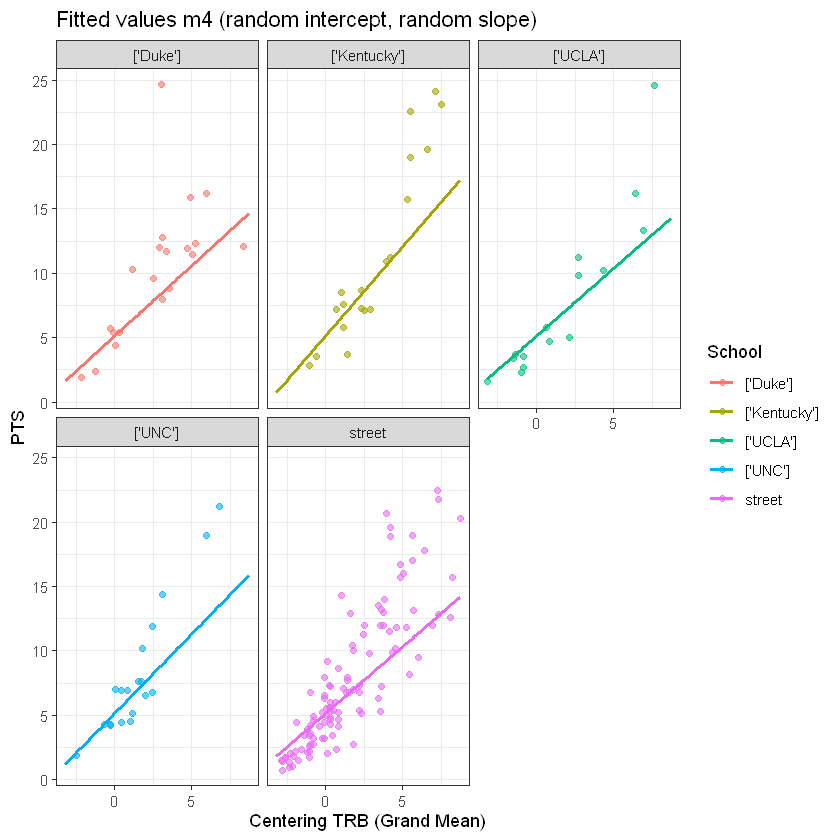

In [65]:
ggplot(nba_top5_schools, aes(x = TRB_cgm, y = PTS, color = School)) +
  geom_point(alpha = 0.6) +
  geom_line(data = line_data, aes(x = TRB_cgm, y = PTS_pred, color = School), size = 1) +
  facet_wrap(~ School) +
  labs(
    title = "Fitted values m4 (random intercept, random slope)",
    x = "Centering TRB (Grand Mean)",
    y = "PTS",
    color = "School"
  ) +
  theme_bw()

Lastly, we obtain the intercepts and slopes of each model.

In [66]:
# Para m3 (solo intercepto aleatorio)
ranefs_m3 <- ranef(m3)$School %>% 
  as.data.frame() %>% 
  rename(intercept_ranef = `(Intercept)`) %>% 
  mutate(School = rownames(ranef(m3)$School)) %>% 
  select(School, intercept_ranef)

fixefs_m3 <- fixef(m3)
intercept_fixed_m3 <- fixefs_m3["(Intercept)"]
slope_fixed_m3 <- fixefs_m3["TRB_cgm"]

ranefs_m3 <- ranefs_m3 %>%
  mutate(
    intercept_total = intercept_fixed_m3 + intercept_ranef,
    slope_fixed = slope_fixed_m3
  )

print("Interceptos y pendiente fija por escuela modelo m3:")
print(ranefs_m3)


[1] "Interceptos y pendiente fija por escuela modelo m3:"
                   School intercept_ranef intercept_total slope_fixed
['Duke']         ['Duke']               0        5.264025    1.090064
['Kentucky'] ['Kentucky']               0        5.264025    1.090064
['UCLA']         ['UCLA']               0        5.264025    1.090064
['UNC']           ['UNC']               0        5.264025    1.090064
street             street               0        5.264025    1.090064


In [67]:
ranefs_m4 <- ranef(m4)$School %>% 
  as.data.frame() %>% 
  rename(
    intercept_ranef = `(Intercept)`,
    slope_ranef = TRB_cgm
  ) %>% 
  mutate(School = rownames(ranef(m4)$School)) %>% 
  select(School, intercept_ranef, slope_ranef)

fixefs_m4 <- fixef(m4)
intercept_fixed_m4 <- fixefs_m4["(Intercept)"]
slope_fixed_m4 <- fixefs_m4["TRB_cgm"]

ranefs_m4 <- ranefs_m4 %>%
  mutate(
    intercept_total = intercept_fixed_m4 + intercept_ranef,
    slope_total = slope_fixed_m4 + slope_ranef
  )

print("Interceptos y pendientes (random slopes) por escuela modelo m4:")
print(ranefs_m4)

[1] "Interceptos y pendientes (random slopes) por escuela modelo m4:"
                   School intercept_ranef slope_ranef intercept_total
['Duke']         ['Duke']               0 -0.06782905        5.093897
['Kentucky'] ['Kentucky']               0  0.22714790        5.093897
['UCLA']         ['UCLA']               0 -0.11051789        5.093897
['UNC']           ['UNC']               0  0.07278935        5.093897
street             street               0 -0.12159031        5.093897
             slope_total
['Duke']        1.092198
['Kentucky']    1.387175
['UCLA']        1.049509
['UNC']         1.232816
street          1.038437
